In [123]:
import glob
import pandas as pd

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth, AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [209]:
from sklearn import preprocessing

In [2]:
data_f = glob.glob('C:/Users/joalam/Documents/Workspace/Lending Club/loan.csv')[0]

In [3]:
df = pd.read_csv(data_f, nrows=5)

In [169]:
df_data = df[['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'open_acc', 'mo_sin_old_il_acct', 'annual_inc']]

In [78]:
def get_columns_from_csv(filename, columns, chunksize=1000, row_limit=10000):
    '''
    columns: list of fields
    filename: full file path
    '''
    dfs = []
    total_rows = 0
    for chunk in pd.read_csv(filename, chunksize=chunksize):
        dfs.append(chunk[columns])
        total_rows += chunksize
        if total_rows > row_limit:
            break
    return pd.concat(dfs)

In [185]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [79]:
def fillna_with_mean(df, fields):
    for f in fields:
        df[f].fillna(df[f].mean(), inplace=True)
    return df

In [180]:
def ensure_float(df, fields):
    for field in fields:
        df[field] = [float(x) if isfloat(x) else float('nan') for x in df[field]]
    return df

In [181]:
x_fields = ['loan_amnt', 'int_rate', 'open_acc', 'mo_sin_old_il_acct' ,'annual_inc']

In [182]:
df_data = get_columns_from_csv(data_f, x_fields, chunksize=3000 )

In [186]:
df_data = ensure_float(df_data, ['annual_inc'])

In [187]:
df_data = fillna_with_mean(df_data, x_fields)

In [189]:
df_test = df_data 
x = df_test.values

In [210]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [190]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=500)

## Mean Shift

In [114]:
ms = MeanShift(bin_seeding=True)
ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

## K Means

In [211]:
model = KMeans(init='k-means++', n_clusters=6, n_init=10)
model.fit(x)
labels = model.labels_

In [212]:
cluster_centers = model.cluster_centers_

number of estimated clusters : 6


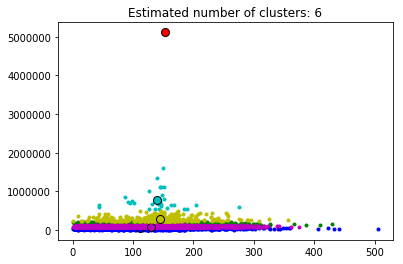

In [213]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
#     print ("my_members: ", my_members)
#     print ("labels: ", labels)
#     print ("k: ", k)
    cluster_center = cluster_centers[k]
    plt.plot(x[my_members, 3], x[my_members, 4], col + '.')
    plt.plot(cluster_center[3], cluster_center[4], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=8)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [221]:
df_test

,loan_amnt,int_rate,open_acc,mo_sin_old_il_acct,annual_inc,label
0,2500,13.56,9,140.0,55000.0,0
1,30000,18.94,13,163.0,90000.0,4
2,5000,17.97,8,87.0,59280.0,0
3,4000,18.94,10,62.0,92000.0,4
4,30000,16.14,12,53.0,57250.0,0
5,5550,15.02,18,195.0,152500.0,1
6,2000,17.97,1,169.0,51000.0,0
7,6000,13.56,19,169.0,65000.0,0
8,5000,17.97,8,145.0,53580.0,0
9,6000,14.47,38,166.0,300000.0,5


In [214]:
df_test['label'] = labels

In [215]:
df_distri = df_test.groupby('label').count()

In [216]:
df_distri = df_distri.rename(columns={'loan_amnt':'count'})[['count']]

In [217]:
df_distri = df_distri.join(df_test.groupby('label').mean())
df_distri.sort_values(by='annual_inc')

,count,loan_amnt,int_rate,open_acc,mo_sin_old_il_acct,annual_inc
label,,,,,,
0,5363,11890.476412,13.227770,10.086892,112.120282,4.509761e+04
4,4373,17937.308484,12.561475,12.487995,130.104200,8.623219e+04
1,1900,22504.855263,12.121842,13.947895,139.055129,1.492345e+05
5,332,25561.822289,11.584187,15.256024,144.362714,2.838988e+05
3,31,26713.709677,11.540645,15.806452,139.000000,7.711323e+05
2,1,20000.000000,7.020000,4.000000,153.000000,5.119032e+06
